In [2]:
import pandas as pd
import numpy as np


In [38]:
data_ori=pd.read_csv('/Users/mar/data/Proyecto-Shark-Mar-S-nchez-de-Salas/Dataset_proyecto_Sharks/datashark.csv', sep=',', encoding='latin-1')

In [69]:
data= data_ori.copy()  #Para trabajar con una copia y poder comparar si fuera necesario
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'''
Lo que puedo hacer es:
    -drop duplicates pero sin pasarse.
    -poner bien todas las columnas.Sustituir espacio por _
    -poner year como int en vez de como float
    -mirar los valores unicos de cada columna y ver si tengo que unificar los valores que sean igual
    -en Species, unificar valores y cambiar nan por "unknown"
    -analisis de nulos y sustutuir por cositas
    -EDA. Ver estadisticas de todo, varianza, correlación. No se pueden borrar columnas.
    -sacar el resultado que sería:
      -especie y numero de ataques, 
      -si es más a mujeres o a hombres
      -por la Activity (si alguna actividad tiene más ataques que otra)"""
      ver si hay dos iguales, con el dato de una se puede llenar la otra date case and year o algo asi 
      for iten in columna 1
        if item es dif al item de la col 1 (con su axis) 
        la hora
''' pues el item de la dos=al de la uno inplace y ya
https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/


In [17]:
data.info() #uy, hay muchos nulos. Y son casi todo objetos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [13]:
data.shape #no se puede borrar columnas y como mínimo tiene que quedarse con 1500 filas

(25723, 24)

# arreglar los nombres de columnas

In [37]:
columnas=list(data.columns)
columnas_bien= [nombre.replace(' ','') for nombre in columnas]
columnas_bien

['CaseNumber',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex',
 'Age',
 'Injury',
 'Fatal(Y/N)',
 'Time',
 'Species',
 'InvestigatororSource',
 'pdf',
 'hrefformula',
 'href',
 'CaseNumber.1',
 'CaseNumber.2',
 'originalorder',
 'Unnamed:22',
 'Unnamed:23']

In [50]:
data.columns=columnas_bien #Ya tiene las columnas bien escritas

# Borrar duplicados

In [41]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25718     True
25719     True
25720     True
25721     True
25722    False
Length: 25723, dtype: bool

In [43]:
data.drop_duplicates(inplace=True)


In [54]:
data.shape, data_ori.shape

((6312, 24), (25723, 24))

In [45]:
data.duplicated().any() #ya no hay duplicados. qué bien. 

False

# Mirar nulos

In [132]:
nan_cols= data.isna().sum()
nan_cols[nan_cols>0]

Case Number               19421
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [113]:
diccna=dict(nan_cols)
diccna

{'Case Number': 19421,
 'Date': 19421,
 'Year': 19423,
 'Type': 19425,
 'Country': 19471,
 'Area': 19876,
 'Location': 19961,
 'Activity': 19965,
 'Name': 19631,
 'Sex ': 19986,
 'Age': 22252,
 'Injury': 19449,
 'Fatal (Y/N)': 19960,
 'Time': 22775,
 'Species ': 22259,
 'Investigator or Source': 19438,
 'pdf': 19421,
 'href formula': 19422,
 'href': 19421,
 'Case Number.1': 19421,
 'Case Number.2': 19421,
 'original order': 19414,
 'Unnamed: 22': 25722,
 'Unnamed: 23': 25721}

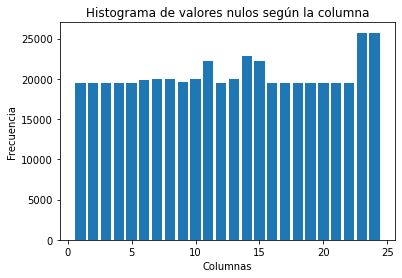

In [133]:
#hacer histograma con columnas y numero de nulos
from matplotlib import pyplot as plt
ejex=[i for i in range(1,25)]
histogram_na = plt.bar(x=ejex, height=diccna.values())
plt.title('Histograma de valores nulos según la columna')
plt.xlabel('Columnas')
plt.ylabel('Frecuencia')
plt.show();


In [130]:
#Borrar los indices 

# Unificar columnas una por una.

## Columna Case Number

In [ ]:
#case number parece "igual" a date, case number 1 y case number 2
#Vamos a cambiar los nulos por "unknown y luego completar las columnas con la info"

In [104]:
data['Case Number']=data['Case Number.1']=data['Case Number.2'] #son similares, vamos a igualarlos.

0         True
1         True
2         True
3         True
4         True
         ...  
25718    False
25719    False
25720    False
25721    False
25722    False
Length: 25723, dtype: bool

## Columna Type

In [87]:
data['Type'].unique()

array(['Boating', 'Unprovoked', 'unknown', 'Provoked', 'Sea Disaster',
       nan], dtype=object)

In [85]:
data['Type'].replace(['Invalid','Questionable','Boat','Boatomg'],
                    ['Unknown','Unknown','Boating','Boating'],
                    inplace = True)



In [91]:
data['Type'].value_counts()

Unprovoked      4595
Provoked         574
unknown          549
Boating          341
Sea Disaster     239
Name: Type, dtype: int64

In [92]:
data_ori['Type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

# Unificar nombre de las especies

In [65]:
data['Species'].unique()


array(['White shark', nan, '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [ ]:
#tenemos: white shark, tiger shark, blue pointer, 
#cambiar ... nan said por 'unknown'

In [66]:
data['Species'].value_counts()

White shark                                                                                                                      163
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   88
Tiger shark                                                                                                                       73
                                                                                                                                ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                  1
Bull shark, 2.3 m [7.5']                                             

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
